<a href="https://colab.research.google.com/github/Aleksandrovna15/MAT-421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module B Part 2 - Alisa Fedorova**

17.4 Lagrange Polynomial Interpolation
*   Unlike using cubic polynomials between data points, lagrange polynomical interpolation calculates a single polynomial between every point in the data set.
*   The Lagrange polynomial L(x_i) is a polinomial with a property L(x_i) = y_i for every point in the data set.
*   After computing L(x_i) function, we can write them as a linear combination of Lagrange basis polynomials P_i(x) = multiply out((x - x_j)/(x_i - x_j)) where L(x) = sum(y_i * P_i(x)).

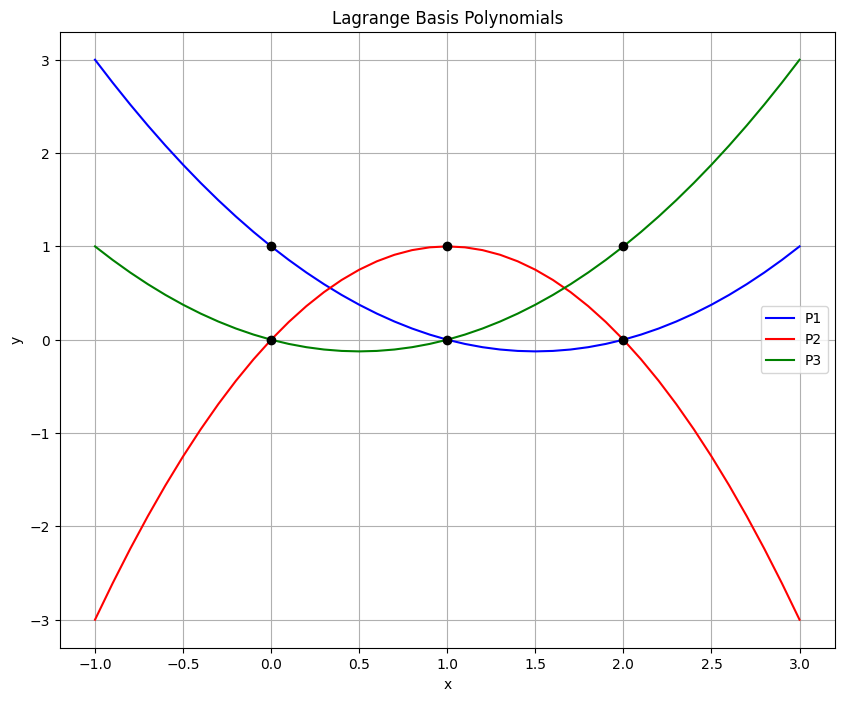

In [5]:
# Lagrange Basis Polynomials
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

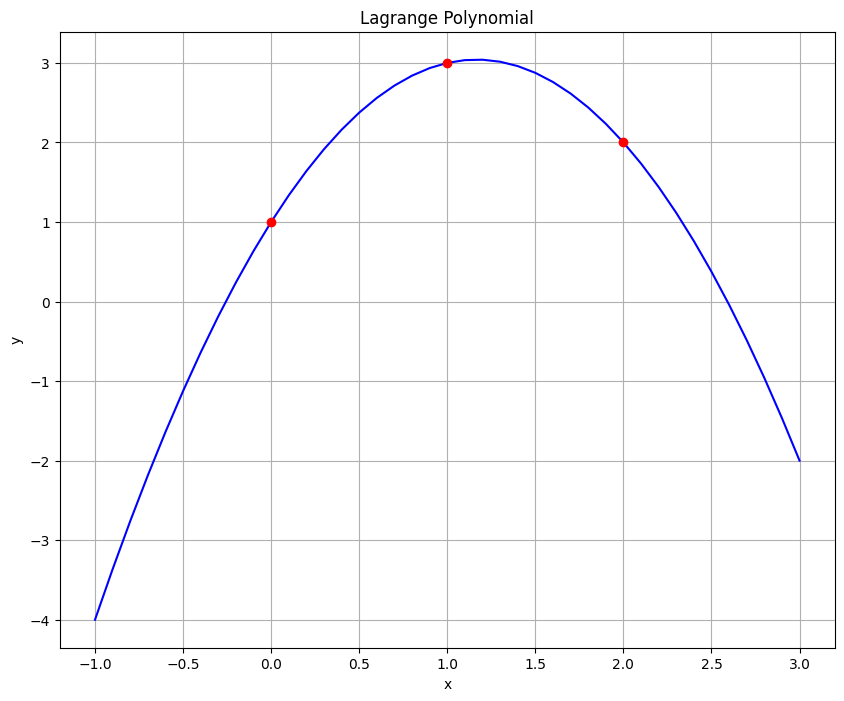

In [6]:
#Lagrange Polynomial
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

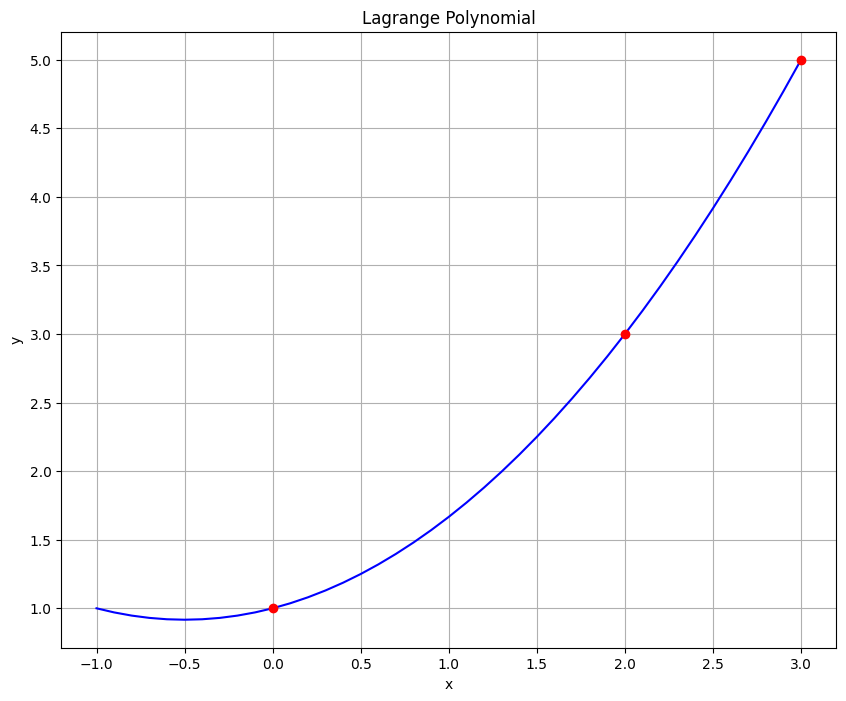

In [14]:
from scipy.interpolate import lagrange

x = [0, 2, 3]
y = [1, 3, 5]
f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.5 Newton's Polynomial Interpolation
*   Newton's Polynomial Interpolation is just another way of computing the polynomial for the data set.
*   The general formula for it is f(x) = sum from i=0 to n (a_i)(n_i(x)) where n_i(x) = product from j=0 to i-1 of (x - x_j)
*   Unlike Lagrange Interpolation, adding more coefficients to the calculations won't change the previous ones.
*   However, the similarity between the two is that the polynomial still satisfies f(x_i) = y_i.

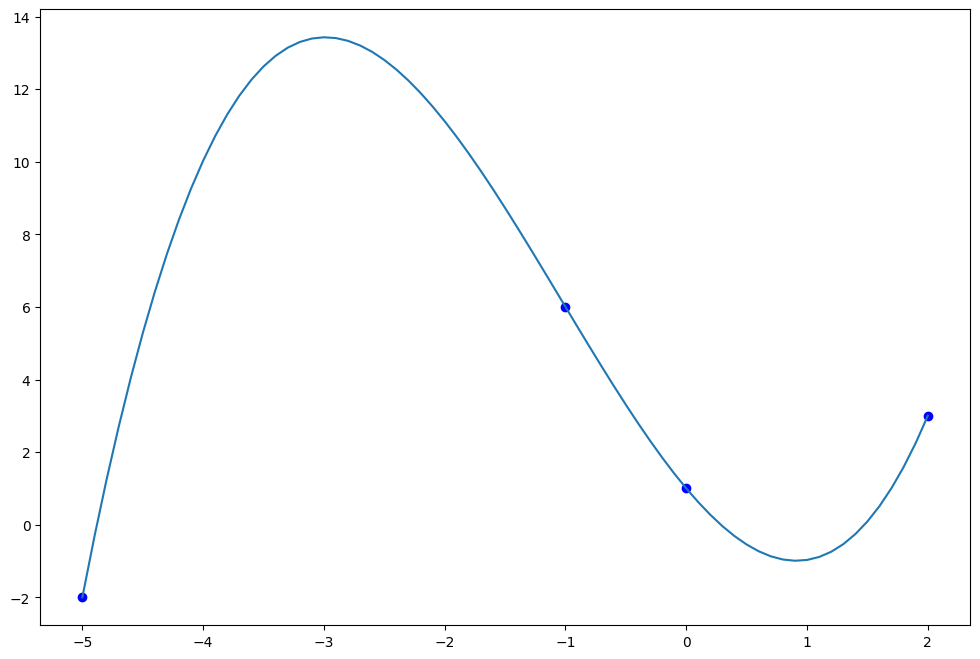

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)